## EDA notebook for Break-Cancer Diagnosis

### Importing necessary packages, and libraries

In [1]:
# Installing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import logging.handlers
import warnings
warnings.filterwarnings('ignore')

import os
import sys

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from project_config import Config
from FileHandler import FileHandler
from log import logger
from data_processor import data_processor
from plot import Plot

### Creating the Classes objects for the scripts

In [2]:
file = FileHandler()
log = logger('eda_logs')
# plot = plot()
file_config = Config()
data_processor = data_processor()
plot = Plot()

### Impoting dataset, and describing the data

In [3]:
# print(Config.Data_path)
df = file.csv_file_read("data")
print("Dataset columns are: ", df.columns)
df.info()

Dataset columns are:  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    

### Describing the dataset, Missing Valriables

In [4]:
# Percentage % of total missing values in the dataset

percent = data_processor.total_percent_missing_data(df)
print("The dataset contains a Total of ", percent, "%", "missing values.")

The dataset contains a Total of  3.03 % missing values.


In [5]:
percent_column_df = data_processor.missing_data_per_column(df)
percent_column_df

,Column,No. of Missing Values,% Missing Values per column
0,id,0,0.0 %
1,diagnosis,0,0.0 %
2,radius_mean,0,0.0 %
3,texture_mean,0,0.0 %
4,perimeter_mean,0,0.0 %
5,area_mean,0,0.0 %
6,smoothness_mean,0,0.0 %
7,compactness_mean,0,0.0 %
8,concavity_mean,0,0.0 %
9,concave points_mean,0,0.0 %


### The missing values, belongs to "Unnamed:32" column

## Droping the "Unnamed:32", and "id" column because it has no any statistical meaning

In [6]:
columns = ["id", "Unnamed: 32"]
df = data_processor.drop_columns(df, columns)
len(df.columns)

31

## Univariate Analysis

1. Diagnosis column

B    357
M    212
Name: diagnosis, dtype: int64


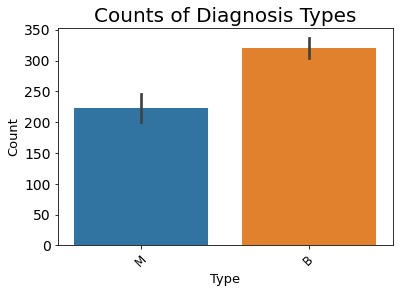

In [7]:
print(df.diagnosis.value_counts())
plot.plot_bar(df, x_col='diagnosis', y_col= df.diagnosis.index, title="Counts of Diagnosis Types", xlabel="Type", ylabel="Count")

### 2. All Other columns are in float datatype values, Describing in terms of statistical values

## Splitting columns by fields for better analysis

In [8]:
mean_columns = df.iloc[:, 1:11]
se_columns = df.iloc[:, 11: 21]
worst_columns = df.iloc[:, 21:31]

In [9]:
mean_columns.columns
# se_columns.columns
# worst_columns.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

### Describing these columns

In [10]:
mean_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [11]:
se_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
perimeter_se,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000
area_se,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540
concavity_se,569.0,0.031894,0.030186,0.000000,0.015090,0.025890,0.042050,0.39600
concave points_se,569.0,0.011796,0.006170,0.000000,0.007638,0.010930,0.014710,0.05279
symmetry_se,569.0,0.020542,0.008266,0.007882,0.015160,0.018730,0.023480,0.07895
fractal_dimension_se,569.0,0.003795,0.002646,0.000895,0.002248,0.003187,0.004558,0.02984


In [12]:
worst_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_worst,569.0,16.269190,4.833242,7.93000,13.01000,14.97000,18.79000,36.0400
texture_worst,569.0,25.677223,6.146258,12.02000,21.08000,25.41000,29.72000,49.5400
perimeter_worst,569.0,107.261213,33.602542,50.41000,84.11000,97.66000,125.40000,251.2000
area_worst,569.0,880.583128,569.356993,185.20000,515.30000,686.50000,1084.00000,4254.0000
smoothness_worst,569.0,0.132369,0.022832,0.07117,0.11660,0.13130,0.14600,0.2226
compactness_worst,569.0,0.254265,0.157336,0.02729,0.14720,0.21190,0.33910,1.0580
concavity_worst,569.0,0.272188,0.208624,0.00000,0.11450,0.22670,0.38290,1.2520
concave points_worst,569.0,0.114606,0.065732,0.00000,0.06493,0.09993,0.16140,0.2910
symmetry_worst,569.0,0.290076,0.061867,0.15650,0.25040,0.28220,0.31790,0.6638
fractal_dimension_worst,569.0,0.083946,0.018061,0.05504,0.07146,0.08004,0.09208,0.2075


## Multi-variate Analysis

### Ploting a Confusion Matrix to understand and see the relation between the features/columns

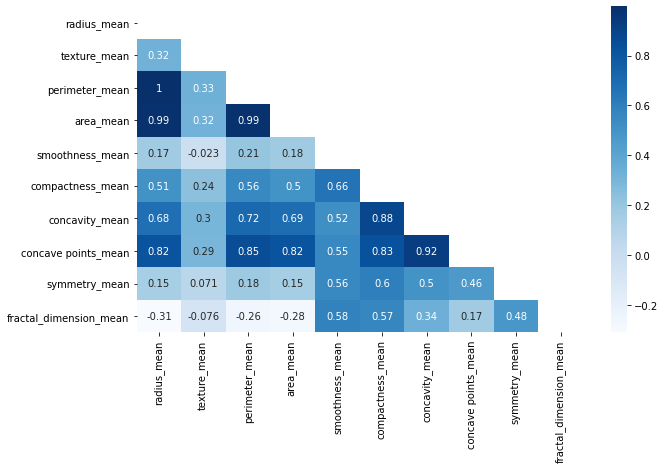

In [13]:
plot.heat(mean_columns, "Blues", (10,6))

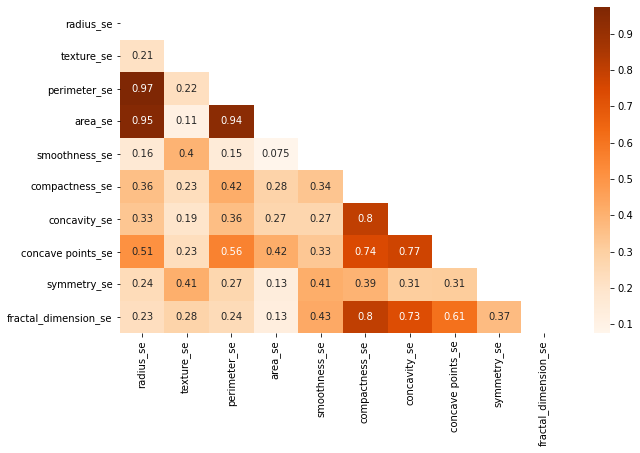

In [14]:
plot.heat(se_columns, "Oranges", (10,6))

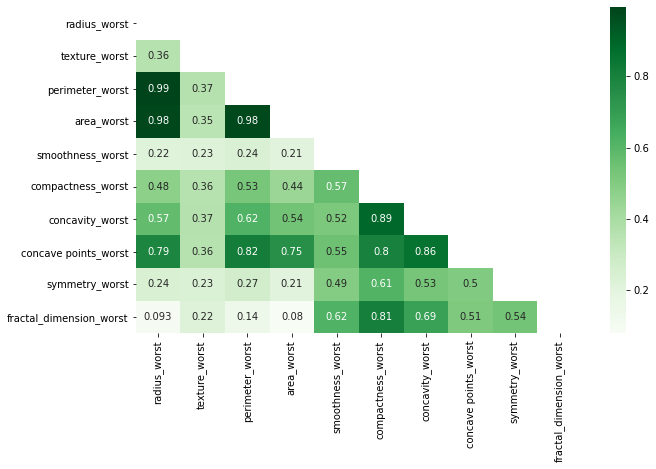

In [15]:
plot.heat(worst_columns, "Greens", (10,6))

### Deductions from the Multi-variate Analysis, There is relation between these features,
### - Summarizing with Highest correlations

1. perimeter - radius
2. area - radius
3. area - perimeter
4. concavity - compactness
5. fractal_dimension - compactness
6. concave points - compactness
7. concave points - concavity
8. concave points - radius
9. concave points - perimeter
10. concave points - area

### Showing the Relationship of these features using Scatter plot

In [16]:
fields = ["mean", "se","worst"]
plot.scatter_feature_plot(df, "perimeter", "radius", "Relation between Perimeter & Radius", fields)

In [17]:
plot.scatter_feature_plot(df, "area", "perimeter", "Relation between Area & Perimeter", fields)

In [18]:
plot.scatter_feature_plot(df, "area", "radius", "Relation between Area & Radius", fields)

In [19]:
plot.scatter_feature_plot(df, "concavity", "compactness", "Relation between concavity & compactness", fields)

In [20]:
plot.scatter_feature_plot(df, "fractal_dimension", "compactness", "Relation between fractal_dimension & compactness", fields)